# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [19]:
a = [-2, -1, 0, 0, 1, 1, 1, 2, 3, 3]
cdf = Cdf(a)
cdf.Value(.41)

1

In [119]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [3]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [4]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [5]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [6]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [7]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [8]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [9]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [10]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [11]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [12]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

In [24]:
def replace_invalid2(df):
    df.agewed.replace([98,99,0], np.nan, inplace=True)
    df.sibs.replace([-1,98,99], np.nan, inplace=True)

replace_invalid2(gss)

print(gss['agewed'].value_counts().sort_index())
print('\n')
print(gss['agewed'].describe())
#seems reasonable

12.0       4
13.0      38
14.0     106
15.0     272
16.0     843
17.0    1453
18.0    2767
19.0    2886
20.0    2719
21.0    3324
22.0    2291
23.0    1980
24.0    1633
25.0    1477
26.0     978
27.0     867
28.0     603
29.0     452
30.0     454
31.0     230
32.0     238
33.0     160
34.0     119
35.0     135
36.0      72
37.0      58
38.0      62
39.0      56
40.0      62
41.0      18
42.0      35
43.0      22
44.0      12
45.0      23
46.0       9
47.0       7
48.0       7
49.0       8
50.0       8
51.0       3
52.0       9
53.0       3
54.0       6
55.0       8
56.0       4
57.0       2
58.0       5
59.0       1
60.0       4
61.0       1
62.0       1
63.0       2
65.0       1
68.0       1
70.0       1
73.0       2
90.0       1
Name: agewed, dtype: int64


count    26543.000000
mean        22.150058
std          4.885114
min         12.000000
25%         19.000000
50%         21.000000
75%         24.000000
max         90.000000
Name: agewed, dtype: float64


In [25]:
print(gss['sibs'].value_counts().sort_index())
print('\n')
print(gss['sibs'].describe())
#The mean for sibs is much higher than I would expect

0.0      3047
1.0     10152
2.0     11313
3.0      9561
4.0      7024
5.0      5066
6.0      3849
7.0      3296
8.0      2165
9.0      1608
10.0     1105
11.0      865
12.0      577
13.0      393
14.0      220
15.0      146
16.0      108
17.0       52
18.0       44
19.0       25
20.0       31
21.0       49
22.0       17
23.0       15
24.0        5
25.0        6
26.0        6
27.0        7
28.0        1
29.0        2
30.0        4
31.0        6
32.0        2
33.0        2
34.0        1
35.0        1
37.0        1
43.0        1
55.0        1
68.0        1
Name: sibs, dtype: int64


count    60775.000000
mean         3.922155
std          3.184487
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         68.000000
Name: sibs, dtype: float64


## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

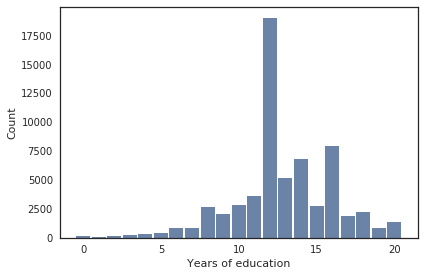

In [26]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

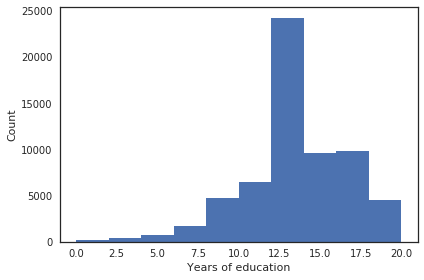

In [27]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna())
decorate(xlabel='Years of education', 
         ylabel='Count')

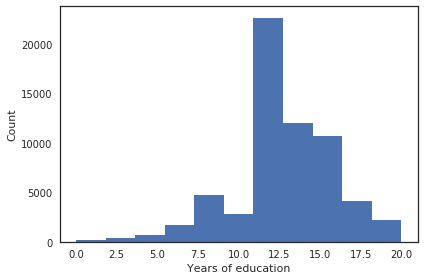

In [32]:
plt.hist(gss.educ.dropna(), bins=11)
decorate(xlabel='Years of education', 
         ylabel='Count')

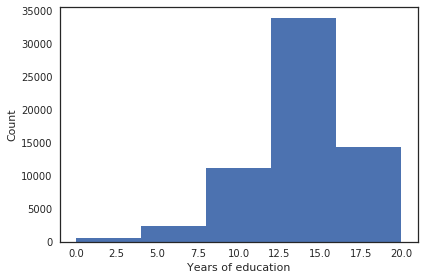

In [33]:
plt.hist(gss.educ.dropna(), bins=5)
decorate(xlabel='Years of education', 
         ylabel='Count')

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

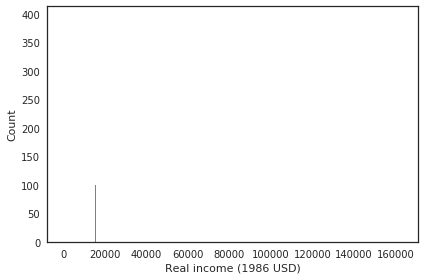

In [34]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

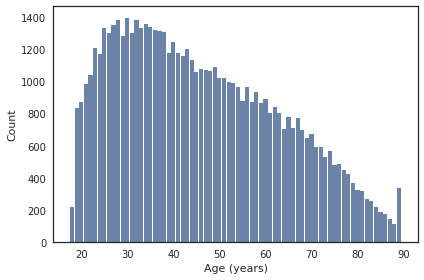

In [36]:
# Solution goes here
hist_age = Hist(gss.age)
thinkplot.hist(hist_age)
decorate(xlabel='Age (years)', 
         ylabel='Count')

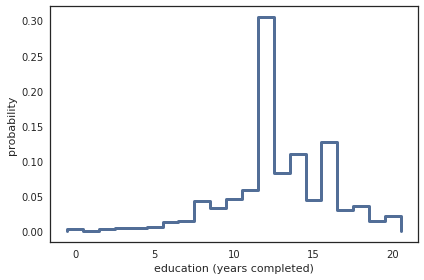

In [39]:
# Solution goes here
pmf_educ = Pmf(gss.educ)
thinkplot.pmf(pmf_educ)
decorate(xlabel='education (years completed)',
         ylabel='probability')

In [44]:
# Solution goes here
sol = pmf_educ[12] + pmf_educ[14] + pmf_educ[16]
print(sol)

0.5422526167084055


**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

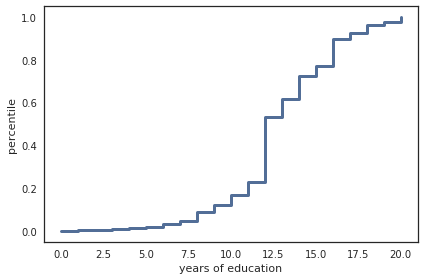

In [48]:
# Solution goes here
cdf_educ = Cdf(gss.educ)
thinkplot.Cdf(cdf_educ)
decorate(xlabel='years of education',
         ylabel='percentile')

In [53]:
# Solution goes here
1-cdf_educ.Prob(12)

0.46729917164322865

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

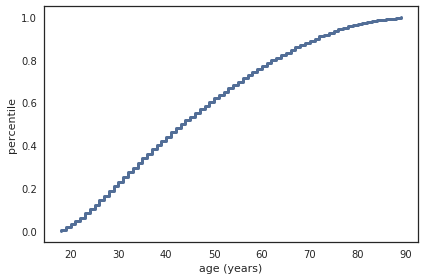

In [54]:
# Solution goes here
cdf_age = Cdf(gss.age)
thinkplot.Cdf(cdf_age)
decorate(xlabel='age (years)',
         ylabel='percentile')

In [59]:
# Solution goes here
#median
cdf_age.Percentile(50)

44.0

In [57]:
# Solution goes here
#IQR
print(str(cdf_age.Percentile(25)) + ' -> ' + str(cdf_age.Percentile(75)))

31.0 -> 59.0


**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

In [82]:
# Solution goes here
def replace_invalid3(df):
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid3(gss)

hist_ad = Hist(gss.adults)
pmf_ad = Pmf(gss.adults)
cdf_ad = Cdf(gss.adults)

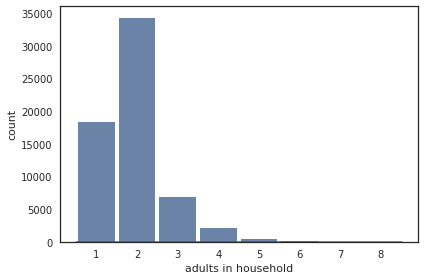

In [84]:
# Solution goes here
thinkplot.Hist(hist_ad)
decorate(xlabel='adults in household',ylabel='count')

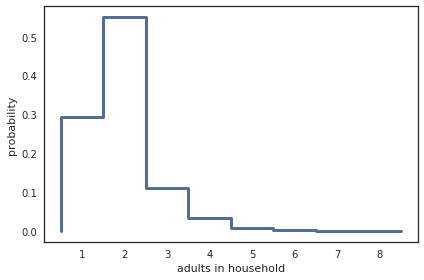

In [87]:
# Solution goes here
thinkplot.Pmf(pmf_ad)
decorate(xlabel='adults in household',ylabel='probability')

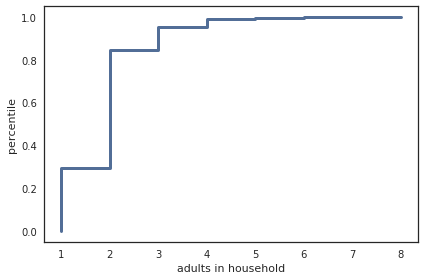

In [89]:
# Solution goes here
thinkplot.Cdf(cdf_ad)
decorate(xlabel='adults in household',ylabel='percentile')

In [90]:
#median
cdf_ad.Percentile(50)

2.0

In [91]:
#IQR
print(str(cdf_ad.Percentile(25)) + ' -> ' + str(cdf_ad.Percentile(75)))

1.0 -> 2.0


In [92]:
gss.adults.describe()

count    62401.000000
mean         1.919761
std          0.807549
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: adults, dtype: float64

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

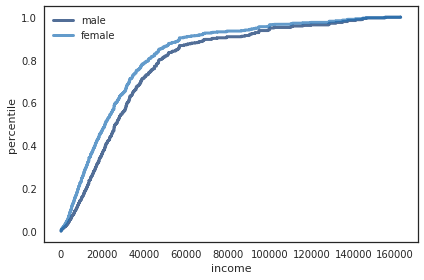

In [80]:
# Solution goes here
male = gss.realinc[gss['sex'] == 1]
female = gss.realinc[gss['sex'] == 2]
cdf_fem = Cdf(female, label='female')
cdf_male = Cdf(male, label='male')

thinkplot.Cdfs([cdf_male,cdf_fem])
decorate(xlabel='income', ylabel='percentile')

In [79]:
# Solution goes here
diff = cdf_male.Percentile(50) - cdf_fem.Percentile(50)
diff

5185.0

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

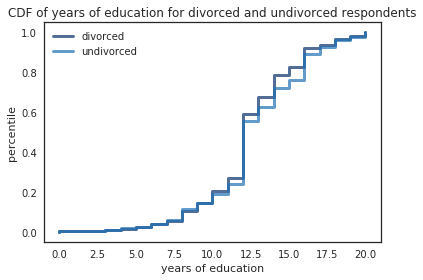

In [108]:
# Solution goes here
def replace_invalid4(df):
    df.divorce.replace([8,9,0], np.nan, inplace=True)
    df.childs.replace([9], np.nan, inplace=True)

replace_invalid4(gss)

divorced = gss.educ[gss['divorce'] == 1]
undivorced = gss.educ[gss['divorce'] == 2]
cdf_div = Cdf(divorced, label='divorced')
cdf_undiv = Cdf(undivorced, label='undivorced')

thinkplot.Cdfs([cdf_div,cdf_undiv])
decorate(xlabel='years of education', ylabel='percentile',
         title='CDF of years of education for divorced and ' +
         'undivorced respondents')

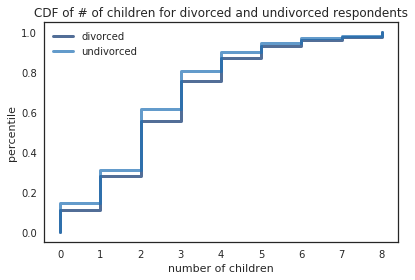

In [107]:
divorced = gss.childs[gss['divorce'] == 1]
undivorced = gss.childs[gss['divorce'] == 2]
cdf_div = Cdf(divorced, label='divorced')
cdf_undiv = Cdf(undivorced, label='undivorced')

thinkplot.Cdfs([cdf_div,cdf_undiv])
decorate(xlabel='number of children', ylabel='percentile',
         title='CDF of # of children for divorced and undivorced' + 
         ' respondents')

In [99]:
# Solution goes here
for col in gss.columns:
    print(col + '\n')

year

id_

agewed

divorce

sibs

childs

age

educ

paeduc

maeduc

speduc

degree

padeg

madeg

spdeg

sex

race

res16

reg16

srcbelt

partyid

pres04

pres08

pres12

polviews

natspac

natenvir

natheal

natcity

natcrime

natdrug

nateduc

natrace

natarms

nataid

natfare

spkath

colath

libath

spkhomo

colhomo

libhomo

cappun

gunlaw

grass

relig

fund

attend

reliten

postlife

pray

relig16

fund16

sprel16

prayer

bible

racmar

racpres

affrmact

happy

hapmar

health

life

helpful

fair

trust

conclerg

coneduc

confed

conpress

conjudge

conlegis

conarmy

satjob

class_

satfin

finrela

union_

fepol

abany

chldidel

sexeduc

premarsx

xmarsex

homosex

spanking

fear

owngun

pistol

hunt

phone

memchurh

realinc

cohort

marcohrt

ballot

wtssall

adults

compuse

databank

wtssnr



## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [112]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [113]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

Load it and see how fast it is!

In [114]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 8.62 ms, sys: 20.5 ms, total: 29.1 ms
Wall time: 27.6 ms


(62466, 101)